# W1 Homework

## Q1 Downloading the data

Downlad jan / feb data files from the s3 bucket..

In [1]:
import os
from urllib import request
from typing import List
from pathlib import Path

DATA_FILES: List[str] = [
 'https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-01.parquet', 
 'https://nyc-tlc.s3.amazonaws.com/trip+data/fhv_tripdata_2021-02.parquet' 
]

LOCAL_DIR: str = './data'

# Create the data dir if it doesnt exist
Path(LOCAL_DIR).mkdir(parents=True, exist_ok=True)

for fileurl in DATA_FILES:
    filename = os.path.basename(fileurl)
    outfile = os.path.join(LOCAL_DIR, filename)
    request.urlretrieve(fileurl, filename=outfile)

Use polars to read the data

In [9]:
import polars as pl
df_trip_data = pl.concat(
    [pl.read_parquet(os.path.join(LOCAL_DIR, f)) 
     for f in os.listdir(LOCAL_DIR) if os.path.splitext(f)[1] == '.parquet'],
    rechunk=True,
    how='vertical' 
)

In [13]:
import datetime
df_trip_data.filter(pl.col('pickup_datetime') < datetime.datetime(2021,2,1)).shape

(1154112, 7)

Answer to the first question: 1154112 records.

Let's double check it loading just the JAN file

In [14]:
pl.read_parquet(os.path.join(LOCAL_DIR, 'fhv_tripdata_2021-01.parquet')).shape

(1154112, 7)

OK we're good ;) 

## Q2 Computing Duration

In [17]:
df_trip_data = (
    df_trip_data
    .with_column( (pl.col('dropOff_datetime') - pl.col('pickup_datetime')).alias('duration'))
)
df_trip_data.head(5)

dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
str,datetime[ns],datetime[ns],f64,f64,i8,str,duration[ns]
"""B00009""",2021-01-01 00:27:00,2021-01-01 00:44:00,null,null,null,"""B00009""",17 minutes
"""B00009""",2021-01-01 00:50:00,2021-01-01 01:07:00,null,null,null,"""B00009""",17 minutes
"""B00013""",2021-01-01 00:01:00,2021-01-01 01:51:00,null,null,null,"""B00013""",1 hour 50 minutes
"""B00037""",2021-01-01 00:13:09,2021-01-01 00:21:26,null,72.0,null,"""B00037""",8 minutes 17 seconds
"""B00037""",2021-01-01 00:38:31,2021-01-01 00:53:44,null,61.0,null,"""B00037""",15 minutes 13 seconds


Compute the average duration in munutes

In [24]:
(df_trip_data
.filter(pl.col('pickup_datetime') < datetime.datetime(2021,2,1))
# Need to use seconds instead of minutes. dt.minutes() truncates the result.
.select((pl.col('duration').dt.seconds()/60.0).mean())
)

duration
f64
19.167224


Q2 - average trip duration in JAN 19.16 min (actually 19.167 ~ 19.17?)

Drop 'outliers'  -> Keep only JAN trips where the duration is between 1 and 60 minutes

In [36]:
df_jan_nooutliers = (
    df_trip_data
    .filter(pl.col('pickup_datetime') < datetime.datetime(2021,2,1))
    .filter(pl.col('duration').dt.seconds() <= (60*60.0))  # 60 min
    .filter(pl.col('duration').dt.seconds() >= (1*60.0))  # 1 min
)
print('Dropped %d records' % (1154112 - df_jan_nooutliers.shape[0]))

Dropped 44286 records


## Q3. Missing values

What's the factions of missing values for the pickup location ID

In [37]:
df_jan_nooutliers.null_count()/(df_jan_nooutliers.shape[0] * 1.0)

dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.835273,0.1332,1.0,0.000697,0.0


- 83.52% Missing PU Location ID
- 13.32% Missing DO Location ID

Replace null values -> -1

In [39]:
df_jan_nooutliers = (
    df_jan_nooutliers.with_columns([
        pl.col(col).fill_null(pl.lit(-1)).keep_name() 
        for col in ['PUlocationID', 'DOlocationID']
    ])
)
# TODO: SHouldn't we do the same for the entire dataset (including feb)?
df_jan_nooutliers.null_count()/(df_jan_nooutliers.shape[0] * 1.0)

dispatching_base_num,pickup_datetime,dropOff_datetime,PUlocationID,DOlocationID,SR_Flag,Affiliated_base_number,duration
f64,f64,f64,f64,f64,f64,f64,f64
0.0,0.0,0.0,0.0,0.0,1.0,0.000697,0.0


## Q4. One-hot encoding

Let's apply one-hot encoding to the pickup and dropoff location IDs. We'll use only these two features for our model. 

* Turn the dataframe into a list of dictionaries
* Fit a dictionary vectorizer 
* Get a feature matrix from it

What's the dimensionality of this matrix? (The number of columns)

[DictVectorizer Reference](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.DictVectorizer.html)
> However, note that this transformer will only do a binary one-hot encoding when feature values are of type string. If categorical features are represented as numeric values such as int or iterables of strings, the DictVectorizer can be followed by OneHotEncoder to complete binary one-hot encoding.

```note
We could have used OneHotEncoder instead, but since the question explicitely asks for a dictionary vectorizer... let's do it this way
``` 

In [78]:
from sklearn.feature_extraction import DictVectorizer
dicts_jan_nooutliers = (
    df_jan_nooutliers
    .select(
        [
            pl.col('PUlocationID').cast(pl.Utf8).keep_name(),
            pl.col('DOlocationID').cast(pl.Utf8).keep_name(), 
        ])
    .to_dicts()
)
vectorizer = DictVectorizer(sparse=True) # Defaults are OK
vectorized_jan_nooutliers = vectorizer.fit_transform(dicts_jan_nooutliers)
print(vectorized_jan_nooutliers.shape)

target = df_jan_nooutliers.select(pl.col('duration').dt.seconds()/60.0).to_numpy().flatten()

(1109826, 525)


Answer: 525 Columns

## Q5. Training a model

* Train a plain linear regression model with default parameters 
* Calculate the RMSE of the model on the training data


In [79]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

lr = LinearRegression().fit(X=vectorized_jan_nooutliers, y=target)
jan_preds_rmse = mean_squared_error(y_true=target, y_pred=lr.predict(vectorized_jan_nooutliers), squared=False)
print('Train (JAN) RMSE: %.3f' % jan_preds_rmse)



Train (JAN) RMSE: 10.529


Answer: 10.52

## Q6. Evaluating the model

What's the RMSE on validation?

Let's assume that Feb is validation. Before attempting to predict/evaluate anything we need to replicate the same preprocessing steps:

1. Impute missing values to -1
1. Remove outilers
1. Encode IDs


In [80]:
df_feb = (
    df_trip_data
    .filter(pl.col('pickup_datetime') >= datetime.datetime(2021,2,1))
    .filter(pl.col('duration').dt.seconds() <= (60*60.0))  # 60 min
    .filter(pl.col('duration').dt.seconds() >= (1*60.0))  # 1 min
    .select([
        pl.col('PUlocationID').fill_null(pl.lit(-1)).cast(pl.Utf8).keep_name(),
        pl.col('DOlocationID').fill_null(pl.lit(-1)).cast(pl.Utf8).keep_name(),
        pl.col('duration')
    ])
)

feb_target = df_feb.select(pl.col('duration').dt.seconds()/60.0).to_numpy().flatten()
vectorized_feb = vectorizer.transform(df_feb.select(['PUlocationID','DOlocationID']).to_dicts())
print(vectorized_feb.shape)

(990113, 525)


In [81]:
feb_preds_rmse = mean_squared_error(y_true=feb_target, y_pred=lr.predict(vectorized_feb), squared=False)
print('Validation (Feb) RMSE: %.3f' % feb_preds_rmse)

Validation (Feb) RMSE: 11.014


Ok, the output it's a little bit off of the 'accepted' answers. I will pick the closest one, but still there's something that's not right.

Answer: 12.85

## Extra stuff 

- How do we compare against the baseline (predict the mean)?
- Do the residuals display any pattern?

In [82]:
from sklearn.dummy import DummyRegressor

dr = DummyRegressor(strategy='mean').fit(X=vectorized_jan_nooutliers, y=target)

jan_preds_rmse = mean_squared_error(y_true=target, y_pred=dr.predict(vectorized_jan_nooutliers), squared=False)
print('DUMMY Train (JAN) RMSE: %.3f' % jan_preds_rmse)

feb_preds_rmse = mean_squared_error(y_true=feb_target, y_pred=dr.predict(vectorized_feb), squared=False)
print('DUMMY Validation (Feb) RMSE: %.3f' % feb_preds_rmse)

DUMMY Train (JAN) RMSE: 11.551
DUMMY Validation (Feb) RMSE: 11.973


Well, at least we improve predicting the mean a little bit. The R2 score should tell us the same...

In [83]:
lr.score(X=vectorized_jan_nooutliers, y=target)

0.1692734417965065

### Inspect the residuals

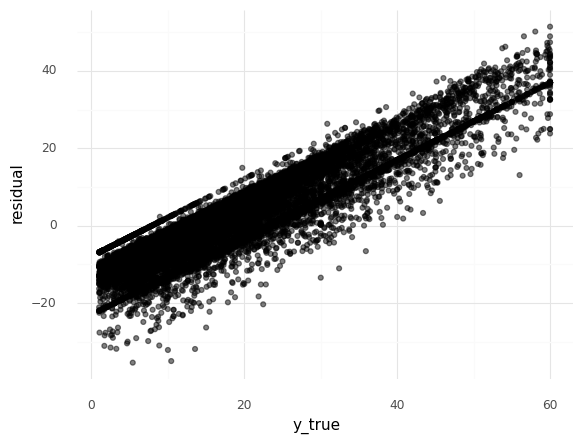

<ggplot: (8767716273460)>

In [93]:
import plotnine as gg
import pandas as pd

train_res = pd.DataFrame(dict(
    y_true=target.flatten(),
    y_pred=lr.predict(vectorized_jan_nooutliers),
    residual=target.flatten()-lr.predict(vectorized_jan_nooutliers)
))

(
    gg.ggplot(train_res.sample(25000), gg.aes(x='y_true', y='residual')) +
    gg.geom_point(alpha=0.5) +
    gg.theme_minimal()
)

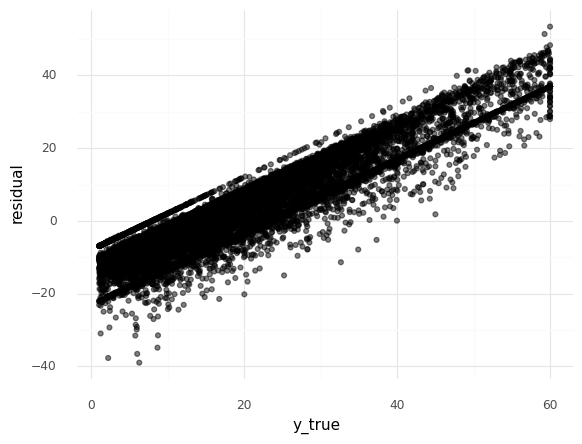

<ggplot: (8767714313695)>

In [94]:
val_res = pd.DataFrame(dict(
    y_true=feb_target.flatten(),
    y_pred=lr.predict(vectorized_feb),
    residual=feb_target.flatten()-lr.predict(vectorized_feb)
))

(
    gg.ggplot(val_res.sample(25000), gg.aes(x='y_true', y='residual')) +
    gg.geom_point(alpha=0.5) +
    gg.theme_minimal()
)